In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# DATASET

Para este proyecto vamos a utilizar los datos disponibles en [Kaggle](https://www.kaggle.com/datasets/aakashjoshi123/exercise-and-fitness-metrics-dataset) donde se recogen datos sobre el proceso de recomposición corporal mediante el ejercicio físico. 

Se trata de un dataset con 12 columnas y un total de 3864 registros.

In [2]:
df = pd.read_csv('./exercise.csv', sep=",")
df.head()

ID     Exercise  Calories Burn  Dream Weight  Actual Weight  Age  Gender  \
0   1   Exercise 2     286.959851     91.892531      96.301115   45    Male   
1   2   Exercise 7     343.453036     64.165097      61.104668   25    Male   
2   3   Exercise 4     261.223465     70.846224      71.766724   20    Male   
3   4   Exercise 5     127.183858     79.477008      82.984456   33    Male   
4   5  Exercise 10     416.318374     89.960226      85.643174   29  Female   

   Duration  Heart Rate        BMI Weather Conditions  Exercise Intensity  
0        37         170  29.426275              Rainy                   5  
1        43         142  21.286346              Rainy                   5  
2        20         148  27.899592             Cloudy                   4  
3        39         170  33.729552              Sunny                  10  
4        34         118  23.286113             Cloudy                   3

In [3]:
df.shape

(3864, 12)

In [4]:
df.size

46368

In [5]:
df.memory_usage(deep=True)

Index                    128
ID                     30912
Exercise              259286
Calories Burn          30912
Dream Weight           30912
Actual Weight          30912
Age                    30912
Gender                239632
Duration               30912
Heart Rate             30912
BMI                    30912
Weather Conditions    240900
Exercise Intensity     30912
dtype: int64

# Variables 

* ID
* Exercise: Tipo de ejercicio
* Caloreis Burn: Total de calorías quemadas por sesión
* Dream Weight: Peso Obejtivo
* Actual Weigt: Peso Actual
* Age: Edad
* Gender: Género 
* Duration: Duración de la sesión
* Heart Rate: Pulsaciones medias
* BMI: IMC
* Weather Conditios: Condiciones climatologicas durante la sesión
* Excersise Intensity: Intensidad del ejercio (ERP, escala de recuperación percibida)

In [6]:
df.columns

Index(['ID', 'Exercise', 'Calories Burn', 'Dream Weight', 'Actual Weight',
       'Age', 'Gender', 'Duration', 'Heart Rate', 'BMI', 'Weather Conditions',
       'Exercise Intensity'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3864 non-null   int64  
 1   Exercise            3864 non-null   object 
 2   Calories Burn       3864 non-null   float64
 3   Dream Weight        3864 non-null   float64
 4   Actual Weight       3864 non-null   float64
 5   Age                 3864 non-null   int64  
 6   Gender              3864 non-null   object 
 7   Duration            3864 non-null   int64  
 8   Heart Rate          3864 non-null   int64  
 9   BMI                 3864 non-null   float64
 10  Weather Conditions  3864 non-null   object 
 11  Exercise Intensity  3864 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 362.4+ KB


# Valores nulos y duplicados

Comprobamos que nuestrso dataset no tiene nigún registro nulo ni duplicado.

In [8]:
df.isna().sum()

ID                    0
Exercise              0
Calories Burn         0
Dream Weight          0
Actual Weight         0
Age                   0
Gender                0
Duration              0
Heart Rate            0
BMI                   0
Weather Conditions    0
Exercise Intensity    0
dtype: int64

In [9]:
df.duplicated().sum()

0

# Resumen Estadístico

In [10]:
df.head(7)

ID     Exercise  Calories Burn  Dream Weight  Actual Weight  Age  Gender  \
0   1   Exercise 2     286.959851     91.892531      96.301115   45    Male   
1   2   Exercise 7     343.453036     64.165097      61.104668   25    Male   
2   3   Exercise 4     261.223465     70.846224      71.766724   20    Male   
3   4   Exercise 5     127.183858     79.477008      82.984456   33    Male   
4   5  Exercise 10     416.318374     89.960226      85.643174   29  Female   
5   6   Exercise 1     479.722690     78.887578      80.596592   60  Female   
6   7   Exercise 9     457.631361     65.681125      61.815386   18    Male   

   Duration  Heart Rate        BMI Weather Conditions  Exercise Intensity  
0        37         170  29.426275              Rainy                   5  
1        43         142  21.286346              Rainy                   5  
2        20         148  27.899592             Cloudy                   4  
3        39         170  33.729552              Sunny                  10  
4        34         118  23.286113             Cloudy                   3  
5        41         169  34.719336              Rainy                  10  
6        53         103  34.594641             Cloudy                  10

In [11]:
df.nunique()

ID                    3864
Exercise                10
Calories Burn         3864
Dream Weight          3864
Actual Weight         3864
Age                     43
Gender                   2
Duration                41
Heart Rate              81
BMI                   3864
Weather Conditions       3
Exercise Intensity      10
dtype: int64

In [12]:
df.describe().T

count         mean          std         min         25%  \
ID                  3864.0  1932.500000  1115.585048    1.000000  966.750000   
Calories Burn       3864.0   301.861806   115.828604  100.009403  202.168837   
Dream Weight        3864.0    75.139263    14.545824   50.001984   62.373585   
Actual Weight       3864.0    75.188440    14.845511   45.783747   62.476906   
Age                 3864.0    39.621118    12.521721   18.000000   29.000000   
Duration            3864.0    40.190994    11.765957   20.000000   30.000000   
Heart Rate          3864.0   139.777950    23.447528  100.000000  119.000000   
BMI                 3864.0    26.801977     4.746745   18.500014   22.686774   
Exercise Intensity  3864.0     5.457298     2.850896    1.000000    3.000000   

                            50%          75%          max  
ID                  1932.500000  2898.250000  3864.000000  
Calories Burn        299.742508   404.143688   499.859262  
Dream Weight          75.522136    87.707989    99.985355  
Actual Weight         75.544407    88.105767   104.309600  
Age                   40.000000    51.000000    60.000000  
Duration              40.000000    51.000000    60.000000  
Heart Rate           140.000000   160.000000   180.000000  
BMI                   26.861656    30.950380    34.996639  
Exercise Intensity     5.000000     8.000000    10.000000

In [13]:
df.describe(include = ['O']).T

count unique         top  freq
Exercise            3864     10  Exercise 5   404
Gender              3864      2      Female  1964
Weather Conditions  3864      3      Cloudy  1332

In [14]:
df.corr()

ID  Calories Burn  Dream Weight  Actual Weight  \
ID                  1.000000      -0.017108     -0.001532      -0.001108   
Calories Burn      -0.017108       1.000000      0.012749       0.010444   
Dream Weight       -0.001532       0.012749      1.000000       0.981377   
Actual Weight      -0.001108       0.010444      0.981377       1.000000   
Age                 0.009428      -0.001113      0.006689       0.003368   
Duration            0.032130       0.021793      0.016116       0.020490   
Heart Rate          0.007062      -0.035889     -0.001855      -0.002543   
BMI                 0.003625       0.012602      0.002237      -0.003703   
Exercise Intensity -0.004103       0.010819      0.000087      -0.002670   

                         Age  Duration  Heart Rate       BMI  \
ID                  0.009428  0.032130    0.007062  0.003625   
Calories Burn      -0.001113  0.021793   -0.035889  0.012602   
Dream Weight        0.006689  0.016116   -0.001855  0.002237   
Actual Weight       0.003368  0.020490   -0.002543 -0.003703   
Age                 1.000000 -0.006567   -0.008939 -0.002915   
Duration           -0.006567  1.000000    0.014941  0.020203   
Heart Rate         -0.008939  0.014941    1.000000  0.015555   
BMI                -0.002915  0.020203    0.015555  1.000000   
Exercise Intensity  0.005565  0.023195   -0.004510 -0.020881   

                    Exercise Intensity  
ID                           -0.004103  
Calories Burn                 0.010819  
Dream Weight                  0.000087  
Actual Weight                -0.002670  
Age                           0.005565  
Duration                      0.023195  
Heart Rate                   -0.004510  
BMI                          -0.020881  
Exercise Intensity            1.000000

<Axes: >

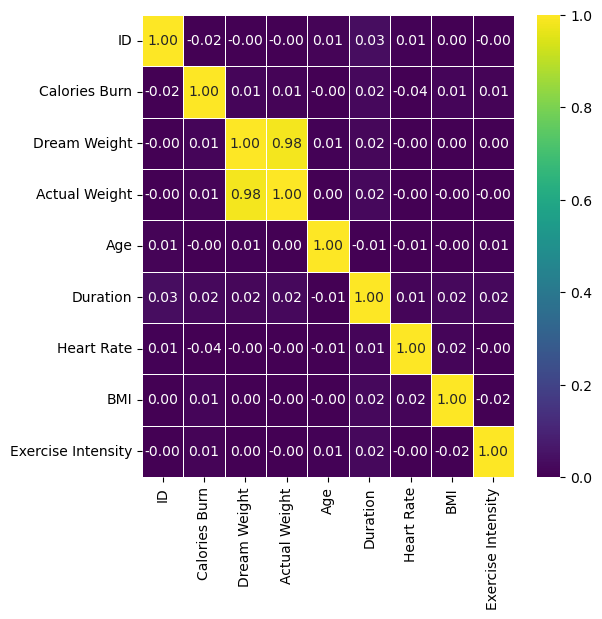

In [15]:
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt='.2f', vmin=0, vmax=1, cmap='viridis')

In [47]:
del df['ID']

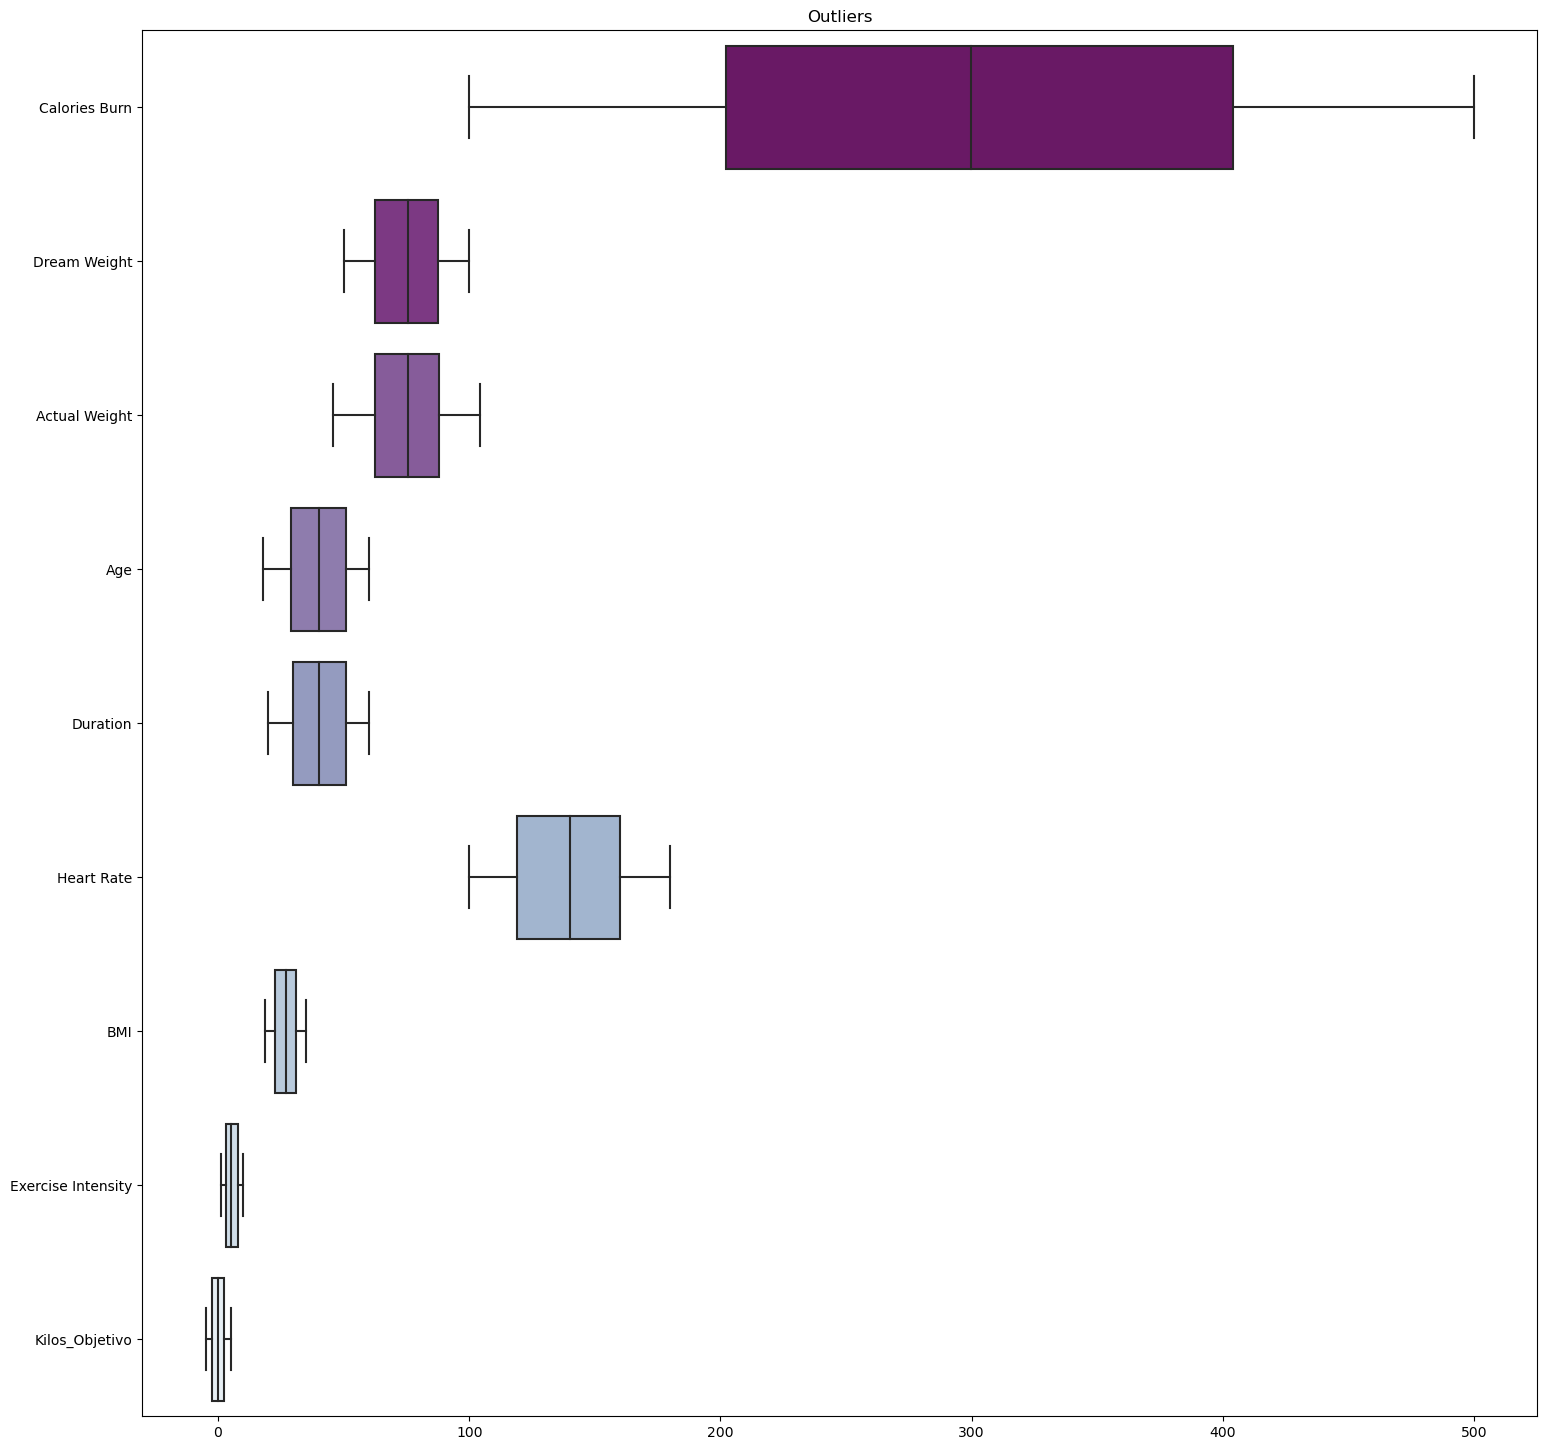

In [100]:
plt.figure(figsize=(18, 18))
sns.boxplot(data=df, orient='h', palette= 'BuPu_r')
plt.title('Outliers')
plt.savefig('Outliers.png', bbox_inches='tight')

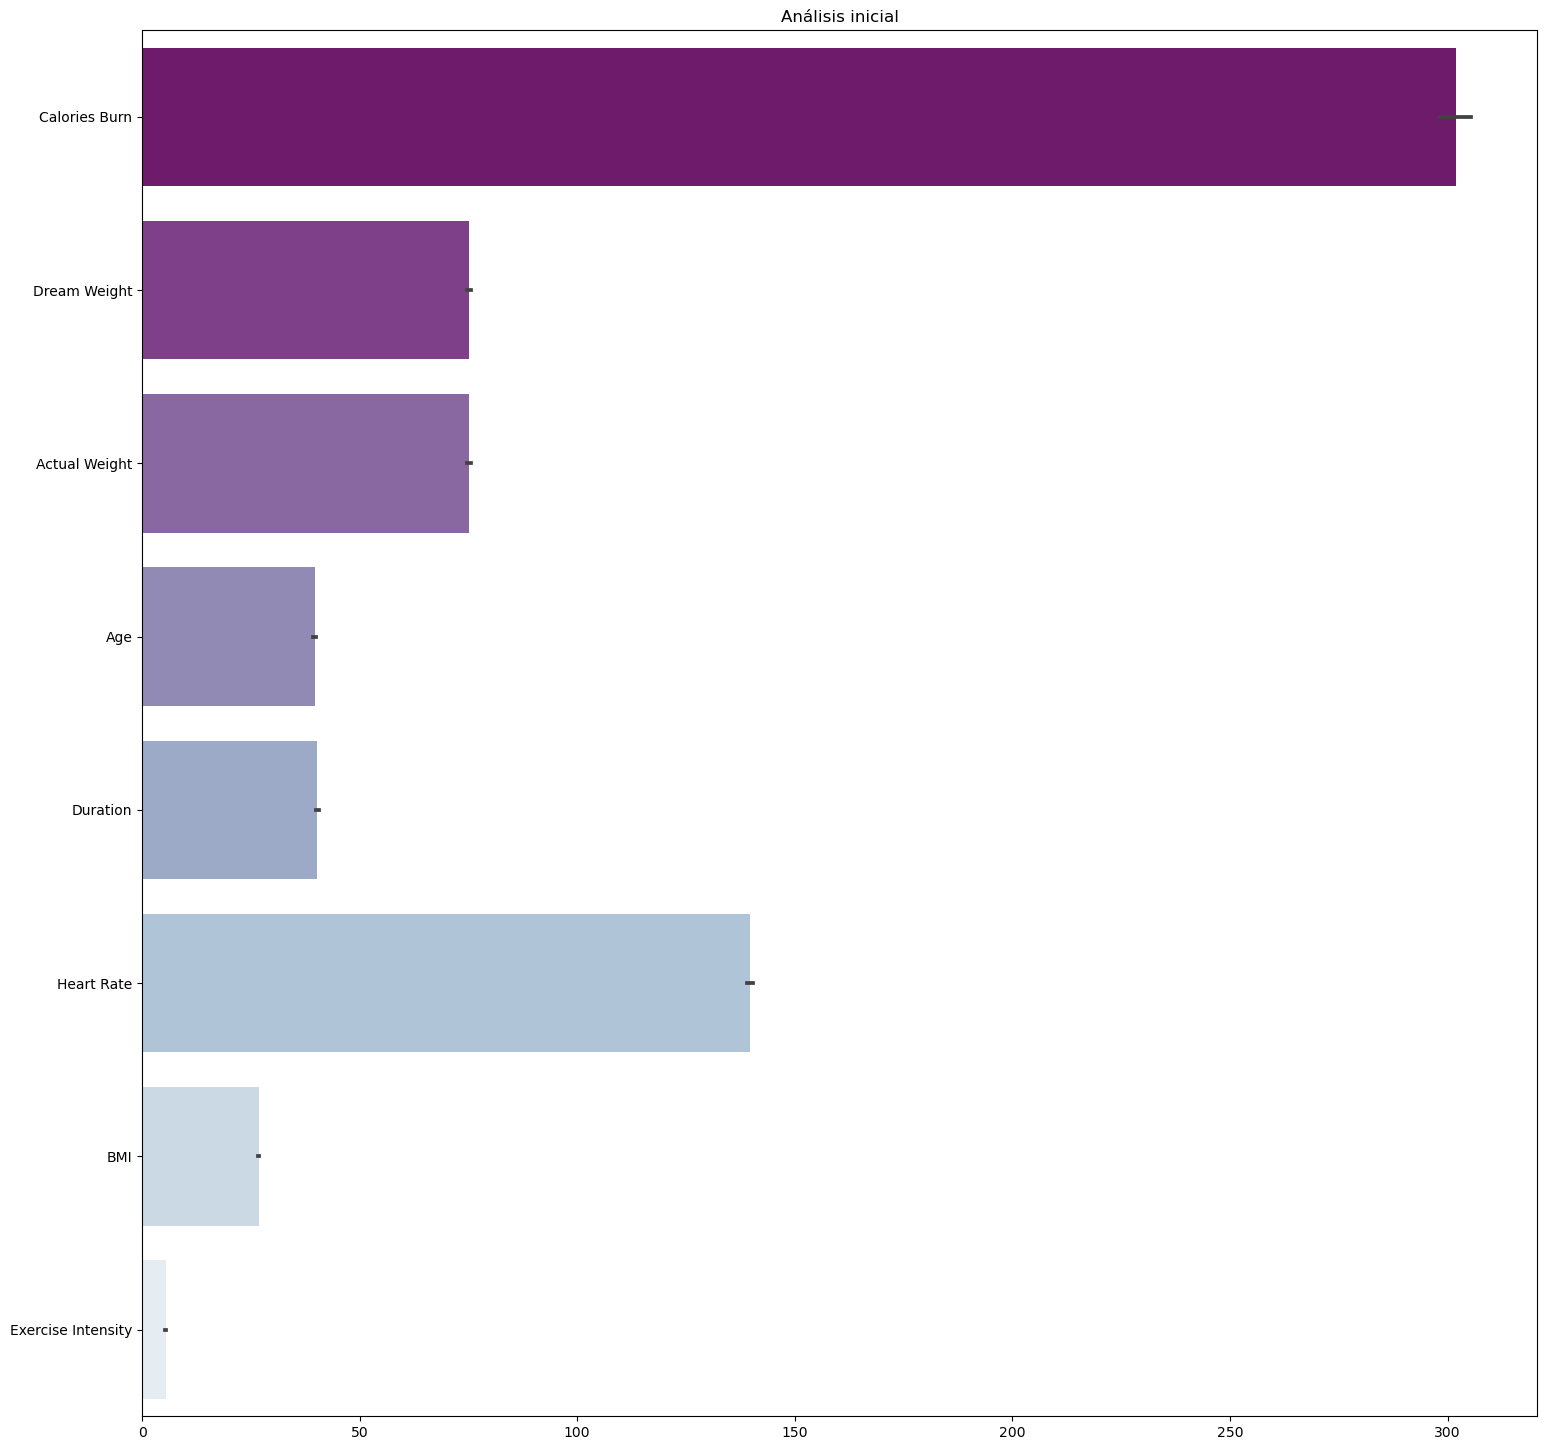

In [49]:
plt.figure(figsize=(18,18))
Barplot = sns.barplot(data=df, orient='h', palette= 'BuPu_r')
plt.title('Análisis inicial')
plt.show()

In [50]:
plt.figure(figsize = (12,12))
df.hist()
plt.tight_layout()

<Figure size 1200x1200 with 0 Axes>

In [19]:
plt.figure(figsize =(18,8))
sns.pairplot(df, diag_kind='kde')

<Figure size 1800x800 with 0 Axes>

# Análisis por variables 

In [20]:
df.columns

Index(['ID', 'Exercise', 'Calories Burn', 'Dream Weight', 'Actual Weight',
       'Age', 'Gender', 'Duration', 'Heart Rate', 'BMI', 'Weather Conditions',
       'Exercise Intensity'],
      dtype='object')

##  1 Exercise

In [21]:
df[['Exercise']].value_counts()

Exercise   
Exercise 5     404
Exercise 1     403
Exercise 10    398
Exercise 8     397
Exercise 9     394
Exercise 7     386
Exercise 3     385
Exercise 6     381
Exercise 4     371
Exercise 2     345
dtype: int64

In [24]:
df.describe(include = ['O']).T

count unique         top  freq
Exercise            3864     10  Exercise 5   404
Gender              3864      2      Female  1964
Weather Conditions  3864      3      Cloudy  1332

## 2 Calories Burn

In [25]:
df[['Calories Burn']].mean()

Calories Burn    301.861806
dtype: float64

## 3 y 4 Weight

In [26]:
df[['Dream Weight']].mean()

Dream Weight    75.139263
dtype: float64

In [43]:
df[['Actual Weight']].mean()

Actual Weight    75.18844
dtype: float64

### Creación de nuevas variables

In [51]:
df["Kilos_Objetivo"] = df['Actual Weight'] - df['Dream Weight']

In [52]:
df

Exercise  Calories Burn  Dream Weight  Actual Weight  Age  Gender  \
0      Exercise 2     286.959851     91.892531      96.301115   45    Male   
1      Exercise 7     343.453036     64.165097      61.104668   25    Male   
2      Exercise 4     261.223465     70.846224      71.766724   20    Male   
3      Exercise 5     127.183858     79.477008      82.984456   33    Male   
4     Exercise 10     416.318374     89.960226      85.643174   29  Female   
...           ...            ...           ...            ...  ...     ...   
3859   Exercise 5     154.113144     98.147291      96.745133   20  Female   
3860   Exercise 4     486.392768     97.598957      92.700573   21  Female   
3861   Exercise 4     264.307731     94.946612      96.778936   57    Male   
3862   Exercise 9     185.951870     64.743906      68.662889   58  Female   
3863   Exercise 7     116.360417     56.757424      59.833403   35    Male   

      Duration  Heart Rate        BMI Weather Conditions  Exercise Intensity  \
0           37         170  29.426275              Rainy                   5   
1           43         142  21.286346              Rainy                   5   
2           20         148  27.899592             Cloudy                   4   
3           39         170  33.729552              Sunny                  10   
4           34         118  23.286113             Cloudy                   3   
...        ...         ...        ...                ...                 ...   
3859        22         139  32.447764             Cloudy                   7   
3860        49         160  26.602475              Rainy                   5   
3861        56         167  31.435348              Rainy                   9   
3862        60         128  19.774614              Rainy                   1   
3863        22         134  29.581330              Rainy                   1   

      Kilos_Objetivo  
0           4.408585  
1          -3.060429  
2           0.920500  
3           3.507448  
4          -4.317052  
...              ...  
3859       -1.402158  
3860       -4.898384  
3861        1.832324  
3862        3.918983  
3863        3.075979  

[3864 rows x 12 columns]

In [28]:
## Cómo sumo el numero de calorias quemadas por tipo de ejercicio 
df[['Exercise', 'Calories Burn']].value_counts()

Exercise    Calories Burn
Exercise 1  100.335105       1
Exercise 6  342.987467       1
            383.263516       1
            383.712600       1
            386.539129       1
                            ..
Exercise 3  240.924787       1
            241.444389       1
            242.120442       1
            244.449708       1
Exercise 9  498.457771       1
Length: 3864, dtype: int64

In [54]:
df['Calories Burn'].hist(by=df['Exercise'])

array([[<Axes: title={'center': 'Exercise 1'}>,
        <Axes: title={'center': 'Exercise 10'}>,
        <Axes: title={'center': 'Exercise 2'}>],
       [<Axes: title={'center': 'Exercise 3'}>,
        <Axes: title={'center': 'Exercise 4'}>,
        <Axes: title={'center': 'Exercise 5'}>],
       [<Axes: title={'center': 'Exercise 6'}>,
        <Axes: title={'center': 'Exercise 7'}>,
        <Axes: title={'center': 'Exercise 8'}>],
       [<Axes: title={'center': 'Exercise 9'}>, <Axes: >, <Axes: >]],
      dtype=object)

## 5 Age
Observamos que la edad mínima de nuestros participantes es de 18 años y la máxima de 60 años. 

In [29]:
df[['Age']].value_counts()

Age
59     123
52     111
31     110
45     109
26     107
53     103
43     102
55     101
57     100
60      97
48      97
49      96
50      96
35      95
19      94
21      93
29      92
20      90
47      90
58      90
36      89
38      89
41      89
24      89
40      88
54      88
33      87
42      87
18      86
34      85
25      85
37      82
30      82
51      80
56      80
28      78
46      76
23      75
32      74
44      73
27      73
39      73
22      60
dtype: int64

In [30]:
df[['Age']].max()

Age    60
dtype: int64

In [31]:
df[['Age']].min()

Age    18
dtype: int64

<Axes: xlabel='Age', ylabel='count'>

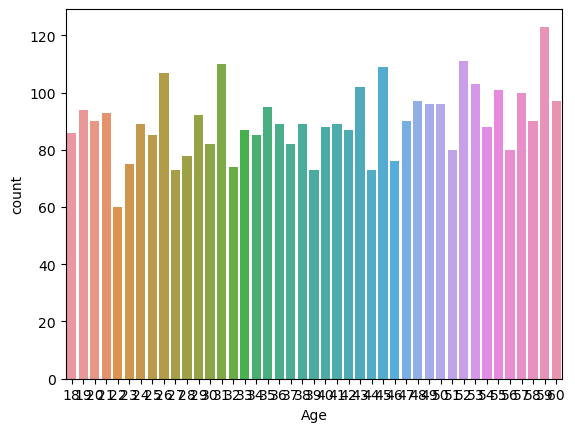

In [32]:
sns.countplot(x='Age', data=df)

## 6 Género

In [33]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [34]:
df.Gender.hist();

In [35]:
df[['Gender']].value_counts()

Gender
Female    1964
Male      1900
dtype: int64

## 10 Weather Conditions

In [36]:
df[['Weather Conditions']].value_counts()

Weather Conditions
Cloudy                1332
Rainy                 1295
Sunny                 1237
dtype: int64

<Axes: xlabel='Weather Conditions', ylabel='count'>

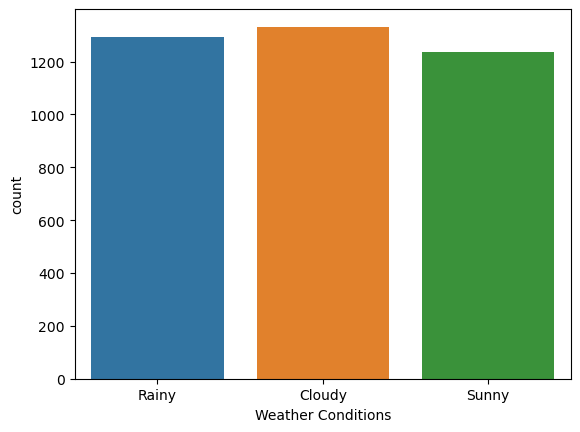

In [37]:
sns.countplot(x='Weather Conditions', data=df)

# Preprocesado datos

Obtendo los dummies del dataset y aplico el procedimiento de normalización ya que como hemos obeservado nuestros datos no son paramétricos es decir no tienen una distribución normal o gaussiana. Para ellos vamos a utilizar las funciones disponibles en la librería SkLearn.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3864 non-null   int64  
 1   Exercise            3864 non-null   object 
 2   Calories Burn       3864 non-null   float64
 3   Dream Weight        3864 non-null   float64
 4   Actual Weight       3864 non-null   float64
 5   Age                 3864 non-null   int64  
 6   Gender              3864 non-null   object 
 7   Duration            3864 non-null   int64  
 8   Heart Rate          3864 non-null   int64  
 9   BMI                 3864 non-null   float64
 10  Weather Conditions  3864 non-null   object 
 11  Exercise Intensity  3864 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 362.4+ KB


In [56]:
df2 = pd.get_dummies(df)

In [57]:
df2.head(10)

Calories Burn  Dream Weight  Actual Weight  Age  Duration  Heart Rate  \
0     286.959851     91.892531      96.301115   45        37         170   
1     343.453036     64.165097      61.104668   25        43         142   
2     261.223465     70.846224      71.766724   20        20         148   
3     127.183858     79.477008      82.984456   33        39         170   
4     416.318374     89.960226      85.643174   29        34         118   
5     479.722690     78.887578      80.596592   60        41         169   
6     457.631361     65.681125      61.815386   18        53         103   
7     272.956982     64.929563      62.806489   42        25         104   
8     195.032273     52.731065      54.537688   49        37         161   
9     259.531145     95.164097      97.436833   41        55         103   

         BMI  Exercise Intensity  Kilos_Objetivo  Exercise_Exercise 1  ...  \
0  29.426275                   5        4.408585                    0  ...   
1  21.286346                   5       -3.060429                    0  ...   
2  27.899592                   4        0.920500                    0  ...   
3  33.729552                  10        3.507448                    0  ...   
4  23.286113                   3       -4.317052                    0  ...   
5  34.719336                  10        1.709014                    1  ...   
6  34.594641                  10       -3.865740                    0  ...   
7  22.050103                   2       -2.123074                    0  ...   
8  30.948847                   1        1.806623                    0  ...   
9  31.224045                  10        2.272736                    0  ...   

   Exercise_Exercise 5  Exercise_Exercise 6  Exercise_Exercise 7  \
0                    0                    0                    0   
1                    0                    0                    1   
2                    0                    0                    0   
3                    1                    0                    0   
4                    0                    0                    0   
5                    0                    0                    0   
6                    0                    0                    0   
7                    0                    0                    0   
8                    0                    0                    0   
9                    0                    0                    0   

   Exercise_Exercise 8  Exercise_Exercise 9  Gender_Female  Gender_Male  \
0                    0                    0              0            1   
1                    0                    0              0            1   
2                    0                    0              0            1   
3                    0                    0              0            1   
4                    0                    0              1            0   
5                    0                    0              1            0   
6                    0                    1              0            1   
7                    0                    0              0            1   
8                    0                    0              0            1   
9                    1                    0              0            1   

   Weather Conditions_Cloudy  Weather Conditions_Rainy  \
0                          0                         1   
1                          0                         1   
2                          1                         0   
3                          0                         0   
4                          1                         0   
5                          0                         1   
6                          1                         0   
7                          1                         0   
8                          0                         0   
9                          1                         0   

   Weather Conditions_Sunny  
0                         0  
1                         0  
2  

In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Calories Burn              3864 non-null   float64
 1   Dream Weight               3864 non-null   float64
 2   Actual Weight              3864 non-null   float64
 3   Age                        3864 non-null   int64  
 4   Duration                   3864 non-null   int64  
 5   Heart Rate                 3864 non-null   int64  
 6   BMI                        3864 non-null   float64
 7   Exercise Intensity         3864 non-null   int64  
 8   Kilos_Objetivo             3864 non-null   float64
 9   Exercise_Exercise 1        3864 non-null   uint8  
 10  Exercise_Exercise 10       3864 non-null   uint8  
 11  Exercise_Exercise 2        3864 non-null   uint8  
 12  Exercise_Exercise 3        3864 non-null   uint8  
 13  Exercise_Exercise 4        3864 non-null   uint8

<Figure size 1200x500 with 0 Axes>

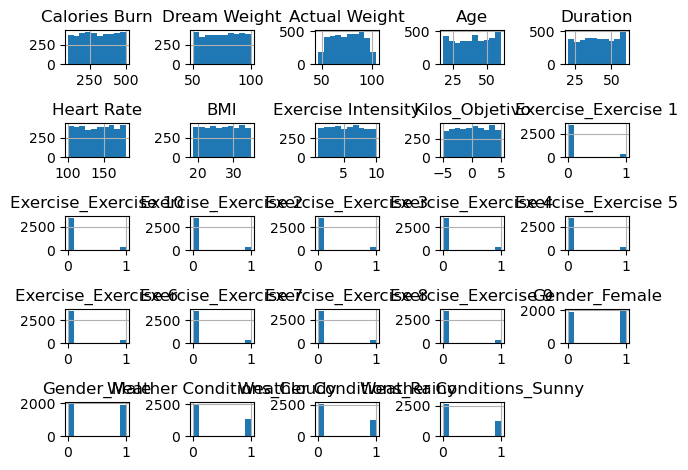

In [83]:
plt.figure(figsize = (12,5))
df2.hist()
plt.tight_layout()

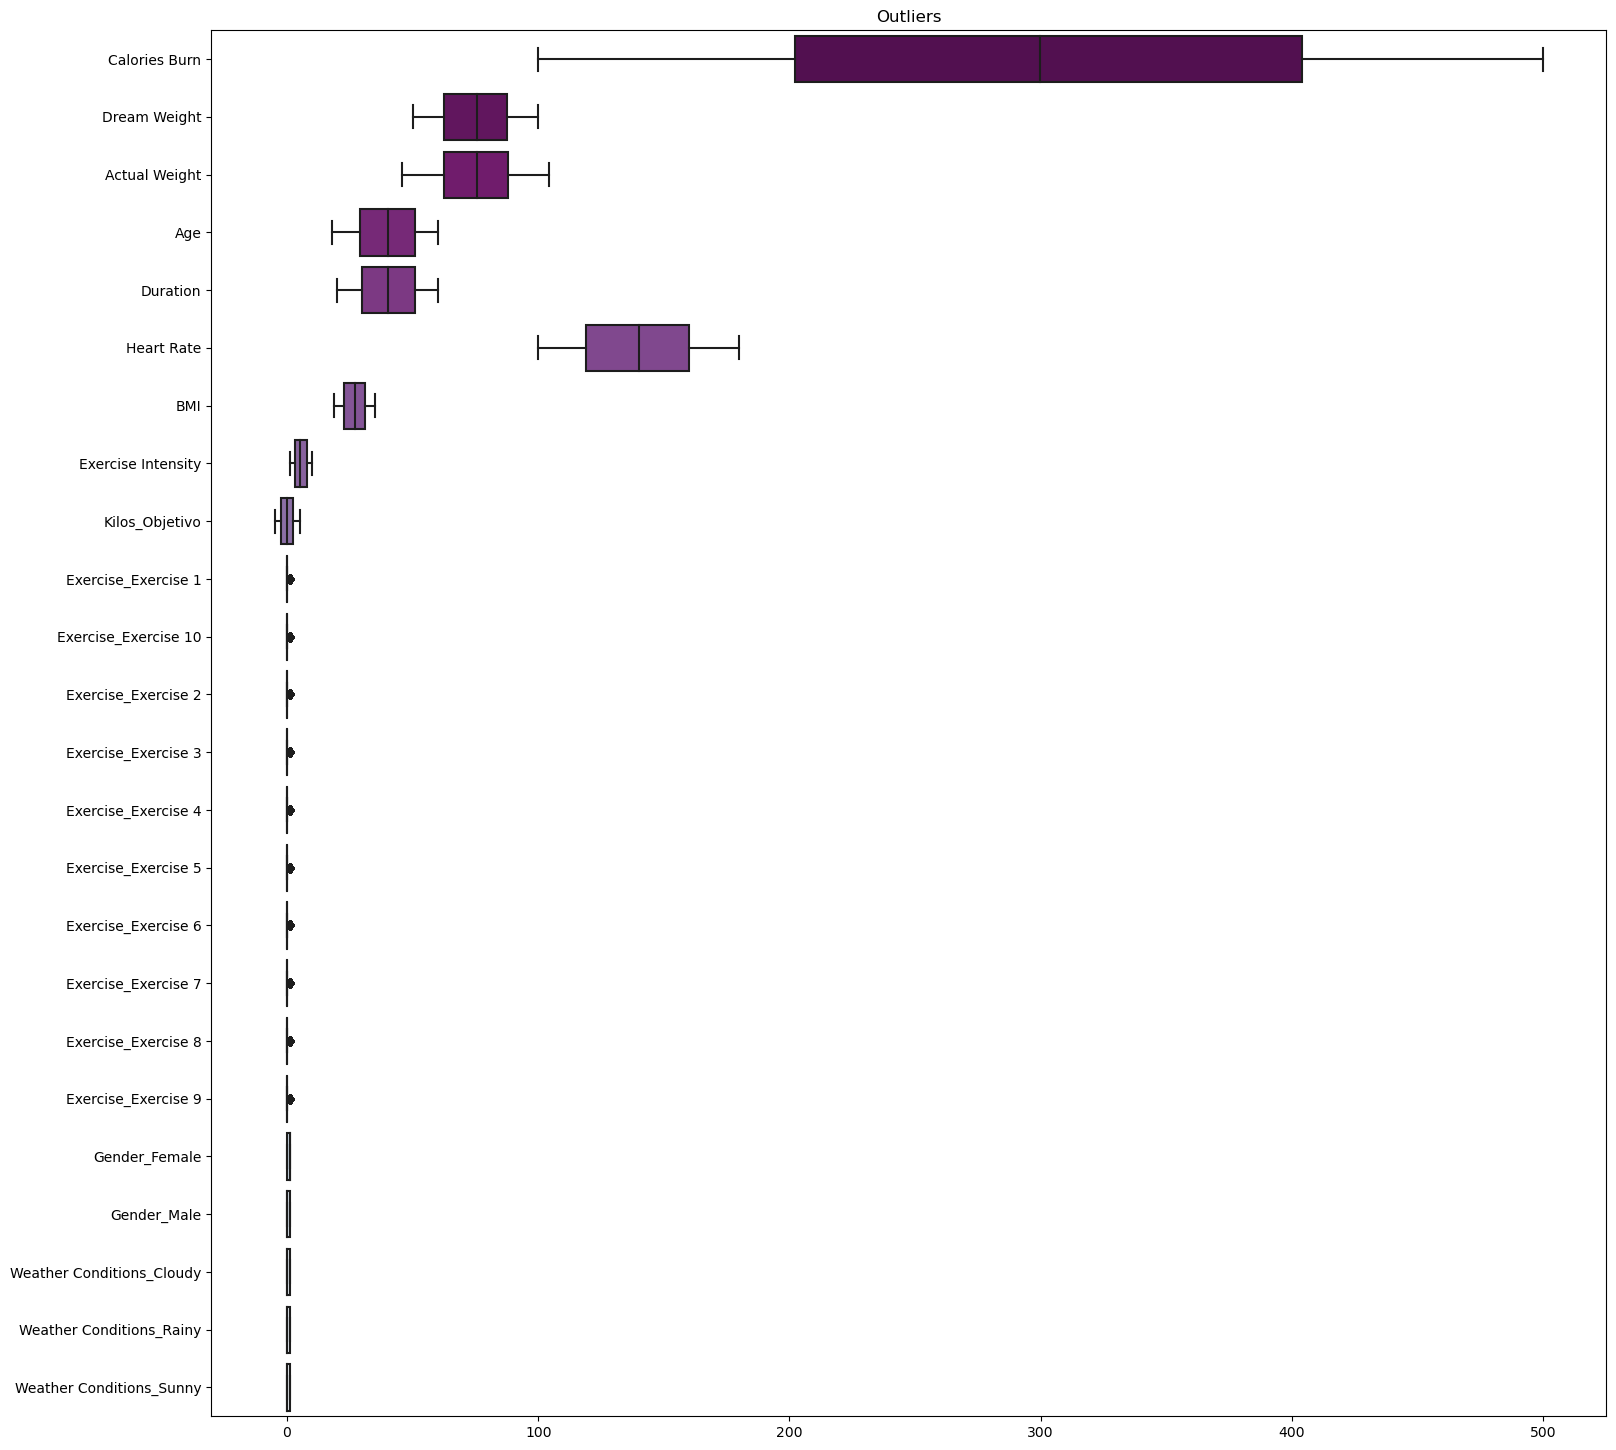

In [102]:
plt.figure(figsize=(18, 18))
sns.boxplot(data=df2, orient='h', palette= 'BuPu_r')
plt.title('Outliers')
plt.savefig('Get-dummies.png', bbox_inches='tight')

<Axes: >

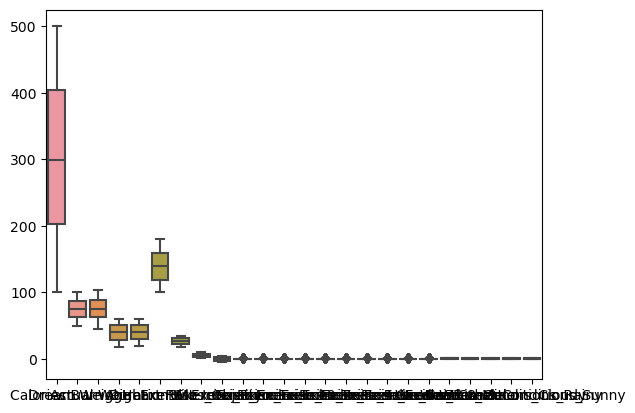

In [67]:
sns.boxplot(data=df2)

In [69]:
from sklearn import preprocessing

In [79]:
from sklearn.preprocessing import MinMaxScaler
df2 = pd.DataFrame(df2)

# Crear una instancia de MinMaxScaler
scaler = MinMaxScaler()

# Escalar el DataFrame completo
df_scaled = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

# Imprimir el DataFrame escalado
print(df_scaled)

      Calories Burn  Dream Weight  Actual Weight       Age  Duration  \
0          0.467552      0.838090       0.863163  0.642857     0.425   
1          0.608838      0.283356       0.261780  0.166667     0.575   
2          0.403186      0.417023       0.443957  0.047619     0.000   
3          0.067962      0.589697       0.635629  0.357143     0.475   
4          0.791069      0.799431       0.681057  0.261905     0.350   
...             ...           ...            ...       ...       ...   
3859       0.135310      0.963226       0.870750  0.047619     0.050   
3860       0.966321      0.952256       0.801643  0.071429     0.725   
3861       0.410900      0.899192       0.871328  0.928571     0.900   
3862       0.214937      0.294937       0.390924  0.952381     1.000   
3863       0.040893      0.135154       0.240059  0.404762     0.050   

      Heart Rate       BMI  Exercise Intensity  Kilos_Objetivo  \
0         0.8750  0.662333            0.444444        0.940879   
1  

In [80]:
df_scaled.head(20)

Calories Burn  Dream Weight  Actual Weight       Age  Duration  \
0        0.467552      0.838090       0.863163  0.642857     0.425   
1        0.608838      0.283356       0.261780  0.166667     0.575   
2        0.403186      0.417023       0.443957  0.047619     0.000   
3        0.067962      0.589697       0.635629  0.357143     0.475   
4        0.791069      0.799431       0.681057  0.261905     0.350   
5        0.949640      0.577904       0.594828  1.000000     0.525   
6        0.894391      0.313687       0.273924  0.000000     0.825   
7        0.432531      0.298651       0.290859  0.571429     0.125   
8        0.237646      0.054600       0.149574  0.738095     0.425   
9        0.398954      0.903543       0.882569  0.547619     0.875   
10       0.371456      0.136601       0.142854  0.547619     0.800   
11       0.691618      0.904187       0.881409  0.404762     0.200   
12       0.527940      0.673767       0.660305  0.857143     0.700   
13       0.994224      0.188425       0.243365  0.547619     0.575   
14       0.879940      0.305658       0.264424  0.023810     0.975   
15       0.562828      0.781680       0.695098  0.857143     0.550   
16       0.292252      0.692952       0.726701  0.476190     0.650   
17       0.693044      0.593146       0.655442  0.571429     0.150   
18       0.894363      0.405297       0.426690  0.523810     0.075   
19       0.008318      0.775235       0.660433  0.738095     0.975   

    Heart Rate       BMI  Exercise Intensity  Kilos_Objetivo  \
0       0.8750  0.662333            0.444444        0.940879   
1       0.5250  0.168903            0.444444        0.193751   
2       0.6000  0.569788            0.333333        0.591965   
3       0.8750  0.923191            1.000000        0.850738   
4       0.2250  0.290126            0.222222        0.068050   
5       0.8625  0.983190            1.000000        0.670840   
6       0.0375  0.975632            1.000000        0.113195   
7       0.0500  0.215201            0.111111        0.287515   
8       0.7625  0.754629            0.000000        0.680604   
9       0.0375  0.771311            1.000000        0.727229   
10      0.6375  0.940650            0.222222        0.231268   
11      0.7250  0.973842            0.555556        0.717221   
12      0.9125  0.971267            0.333333        0.574860   
13      0.2625  0.632333            0.000000        0.560580   
14      0.9250  0.475255            0.333333        0.097719   
15      0.0625  0.633892            0.888889        0.239005   
16      0.2375  0.920120            0.666667        0.867644   
17      0.3250  0.326937            0.888889        0.949487   
18      0.3625  0.893431            0.111111        0.549508   
19      0.6125  0.118061            0.777778        0.068283   

    Exercise_Exercise 1  ...  Exercise_Exercise 5  Exercise_Exercise 6  \
0                   0.0  ...                  0.0                  0.0   
1                   0.0  ...                  0.0                  0.0   
2                   0.0  ...                  0.0                  0.0   
3                   0.0  ...                  1.0                  0.0   
4                   0.0  ...                  0.0                  0.0   
5                   1.0  ...                  0.0                  0.0   
6                   0.0  ...                  0.0                  0.0   
7                   0.0  ...                  0.0                  0.0   
8                   0.0  ...                  0.0                  0.0   
9                   0.0  ...                  0.0                  0.0   
10                  0.0  ...                  1.0                  0.0   
11                  1.0  ...                  0.0                  0.0   
12                  1.0  ...                  0.0                  0.0   
13                  0.0  ...                  0.0                  0.0   
14                  0.0  ...                  0.0                  0.0   
15  

<Axes: >

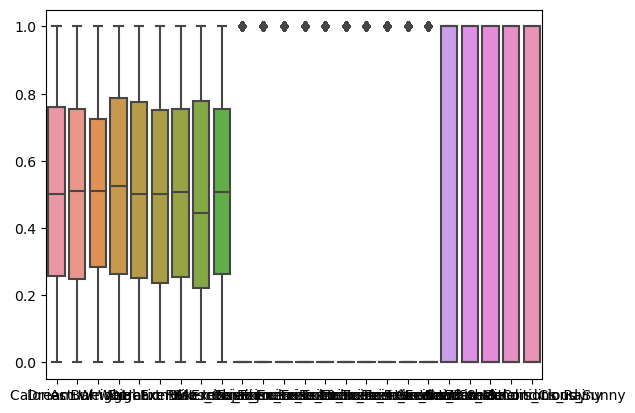

In [81]:
sns.boxplot(data=df_scaled)

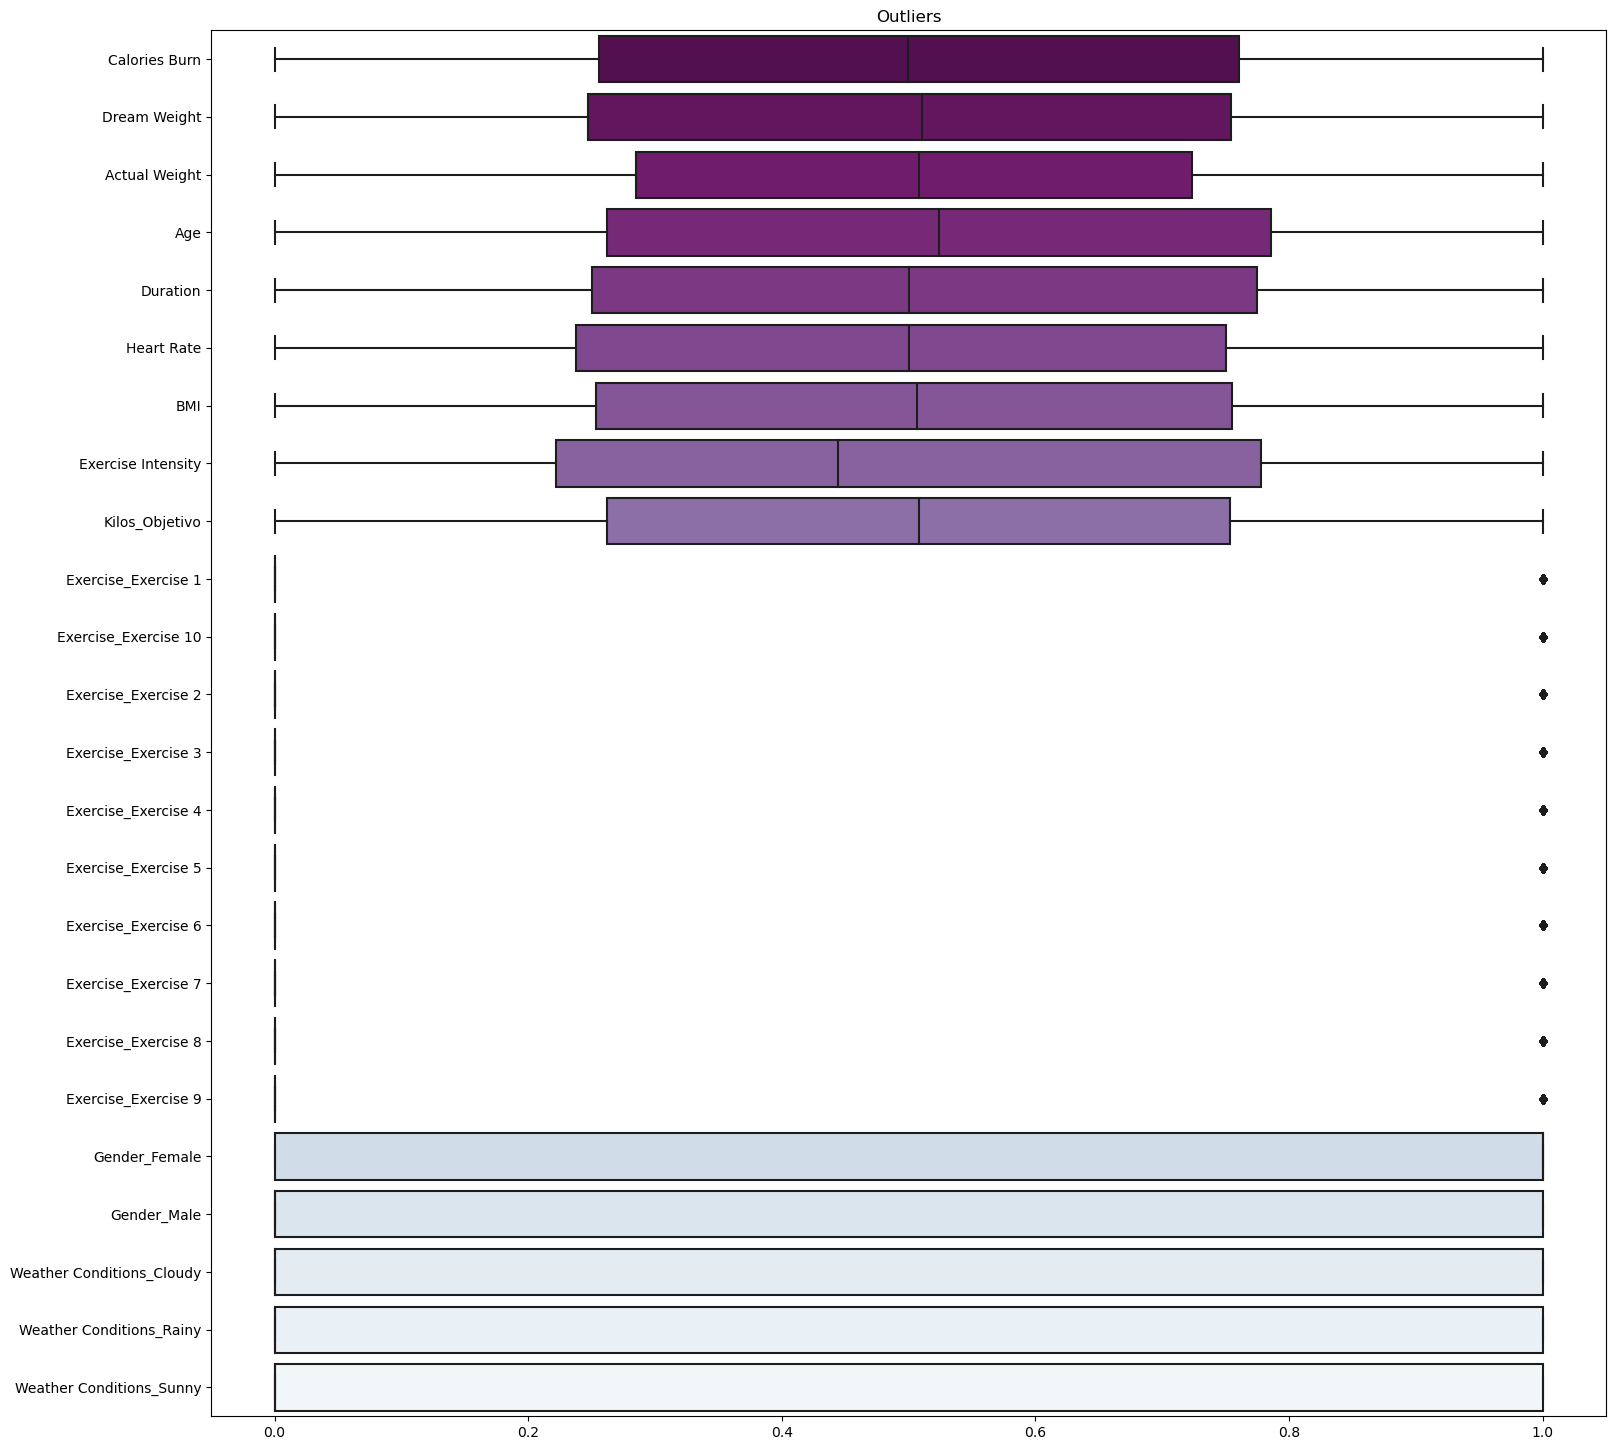

In [101]:
plt.figure(figsize=(18, 18))
sns.boxplot(data=df_scaled, orient='h', palette= 'BuPu_r')
plt.title('Outliers')
plt.savefig('Preprocesado Ouliers.png', bbox_inches='tight')

In [96]:
X = df_scaled.drop(['Calories Burn'], axis=1)
y = df_scaled['Calories Burn']

In [97]:
df_scaled['Calories Burn'].value_counts(normalize = True)

0.467552    0.000259
0.381554    0.000259
0.153353    0.000259
0.204813    0.000259
0.116630    0.000259
              ...   
0.231317    0.000259
0.443614    0.000259
0.093970    0.000259
0.417427    0.000259
0.040893    0.000259
Name: Calories Burn, Length: 3864, dtype: float64

In [98]:
X.describe()

Dream Weight  Actual Weight          Age     Duration   Heart Rate  \
count   3864.000000    3864.000000  3864.000000  3864.000000  3864.000000   
mean       0.502913       0.502422     0.514789     0.504775     0.497224   
std        0.291013       0.253657     0.298136     0.294149     0.293094   
min        0.000000       0.000000     0.000000     0.000000     0.000000   
25%        0.247514       0.285227     0.261905     0.250000     0.237500   
50%        0.510573       0.508505     0.523810     0.500000     0.500000   
75%        0.754371       0.723134     0.785714     0.775000     0.750000   
max        1.000000       1.000000     1.000000     1.000000     1.000000   

               BMI  Exercise Intensity  Kilos_Objetivo  Exercise_Exercise 1  \
count  3864.000000         3864.000000     3864.000000          3864.000000   
mean      0.503252            0.495255        0.504806             0.104296   
std       0.287740            0.316766        0.285264             0.305684   
min       0.000000            0.000000        0.000000             0.000000   
25%       0.253795            0.222222        0.262193             0.000000   
50%       0.506870            0.444444        0.508437             0.000000   
75%       0.754722            0.777778        0.753317             0.000000   
max       1.000000            1.000000        1.000000             1.000000   

       Exercise_Exercise 10  ...  Exercise_Exercise 5  Exercise_Exercise 6  \
count           3864.000000  ...          3864.000000          3864.000000   
mean               0.103002  ...             0.104555             0.098602   
std                0.304001  ...             0.306019             0.298166   
min                0.000000  ...             0.000000             0.000000   
25%                0.000000  ...             0.000000             0.000000   
50%                0.000000  ...             0.000000             0.000000   
75%                0.000000  ...             0.000000             0.000000   
max                1.000000  ...             1.000000             1.000000   

       Exercise_Exercise 7  Exercise_Exercise 8  Exercise_Exercise 9  \
count          3864.000000          3864.000000          3864.000000   
mean              0.099896             0.102743             0.101967   
std               0.299901             0.303663             0.302644   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               0.000000             0.000000             0.000000   
75%               0.000000             0.000000             0.000000   
max               1.000000             1.000000             1.000000   

       Gender_Female  Gender_Male  Weather Conditions_Cloudy  \
count    3864.000000  3864.000000                3864.000000   
mean        0.508282     0.491718                   0.344720   
std         0.499996     0.499996                   0.475339   
min         0.000000     0.000000                   0.000000   
25%         0.000000     0.000000                   0.000000   
50%         1.000000     0.000000                   0.000000   
75%         1.000000     1.000000                   1.000000   
max         1.000000     1.000000                   1.000000   

       Weather Conditions_Rainy  Weather Conditions_Sunny  
count               3864.000000               3864.000000  
mean                   0.335145                  0.320135  
std                    0.472102                  0.466588  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    1.000000                  1.000000  
max                    1.000000                  1.000000  

[8 rows x 23 columns]

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelado de ML

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

In [111]:
#Instanciamos el modelo
regr = LinearRegression()

In [112]:
#Entrenamos el modelo
regr.fit(X_train, y_train)

LinearRegression()

In [131]:
#PREDECIR
y_pred_test = regr.predict(X_test)

In [132]:
y_pred_train = regr.predict(X_train)

In [114]:
print(y_pred)

[0.51653435 0.53306737 0.47426797 ... 0.51294644 0.51338686 0.54391886]


In [137]:
print("Coefficients: \n", regr.coef_)
print("MSE: %.2f" % mean_squared_error(y_test, y_pred_test))
print("R2: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [-0.00115714 -0.00239067  0.01214385  0.01554916 -0.00291904 -0.0030771
 -0.01616205 -0.00821035 -0.04089126 -0.02948096 -0.00635279 -0.00100342
  0.0393919   0.00172904 -0.00179242  0.0170068   0.00797281  0.0134203
  0.00128539 -0.00128539  0.0011524   0.00271964 -0.00387204]
MSE: 0.08
R2: -0.01


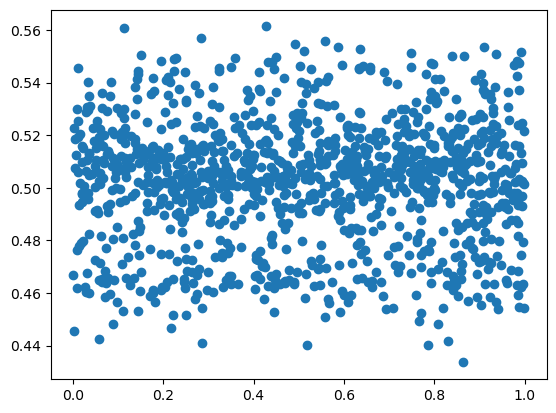

<Figure size 640x480 with 0 Axes>

In [141]:
plt.scatter(y_test, y_pred_test)
plt.show()
plt.savefig('Predicción.jpg', bbox_inches='tight')

In [134]:
from sklearn.metrics import mean_squared_error

In [135]:
errors = mean_squared_error(y_train, y_pred_train)
# report error
print(errors)

0.08312805099360898


In [136]:
errors = mean_squared_error(y_test, y_pred_test)
# report error
print(errors)

0.08496807038257907
